<a href="https://colab.research.google.com/github/EmersonAlvaro/snakeID/blob/master/Copy_of_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pathlib
import os
import gc
import cv2 as cv
import random

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
# from tensorflow.keras.utils import np_utils
from sklearn import metrics
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.losses import sparse_categorical_crossentropy
from  tensorflow.keras.optimizers import Adam

num_class = 4
IMAGE_SIZE = 256
epoch = 70
loss_function = sparse_categorical_crossentropy
optmizer = Adam()
num_folds = 10

#container for metrics
acc_folds = []
f1_folds = []
prec_folds =[]
recall_folds = []

#Colab Path
train_data = pathlib.Path('/content/drive/My Drive/MozSnake/train/')
test_data = pathlib.Path('/content/drive/My Drive/MozSnake/test/')
pesos = pathlib.Path('/content/drive/My Drive/MozSnake/pesos/')

from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# **Read data from my drive**

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    file_names = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names += [os.path.join(label_directory, f)
                       for f in os.listdir(label_directory)]

    random.shuffle(file_names)
    random.shuffle(file_names)

    for f in file_names:
        # print(f)
        img = cv.imread(f)
        img = cv.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

        dirname = os.path.split(os.path.dirname(f))[1]

        # print(dirname)

        images.append(img)
        labels.append(int(dirname))

    images, labels = np.asarray(images), np.asarray(labels)
    images = images.astype('float32') / 255.0

    return images, labels

imagens, labels = load_data(train_data)
print(imagens.shape)
print(labels.shape)

(1824, 256, 256, 3)
(1824,)


# **# Arquitetura do Xception**

(1641, 256, 256, 3)
(1641,)
Train on 1641 samples, validate on 183 samples
Epoch 1/70
1632/1641 [============================>.] - ETA: 0s - loss: 3.0485 - acc: 0.3339
Epoch 00001: acc improved from -inf to 0.33577, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 107s 65ms/sample - loss: 3.0437 - acc: 0.3358 - val_loss: 2.5159 - val_acc: 0.2459
Epoch 2/70
1632/1641 [============================>.] - ETA: 0s - loss: 2.0871 - acc: 0.4700
Epoch 00002: acc improved from 0.33577 to 0.46984, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 36s 22ms/sample - loss: 2.0849 - acc: 0.4698 - val_loss: 2.1238 - val_acc: 0.2459
Epoch 3/70
1632/1641 [============================>.] - ETA: 0s - loss: 1.6408 - acc: 0.5319
Epoch 00003: acc improved from 0.46984 to 0.53382, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [=============================

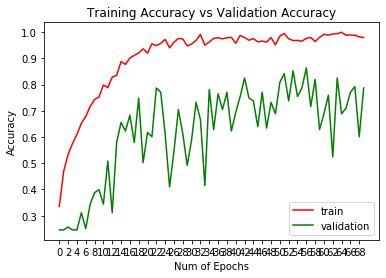

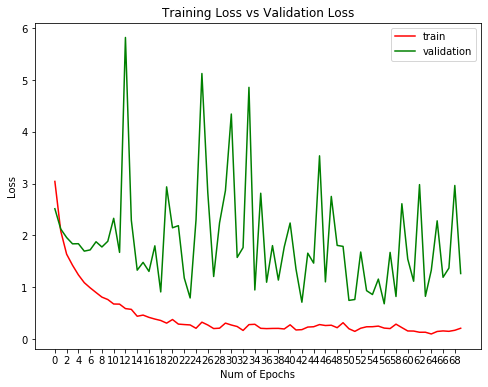

(1641, 256, 256, 3)
(1641,)
Load Model
Train on 1641 samples, validate on 183 samples
Epoch 1/70
1632/1641 [============================>.] - ETA: 0s - loss: 1.6237 - acc: 0.6005
Epoch 00001: acc improved from -inf to 0.60146, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 76s 46ms/sample - loss: 1.6210 - acc: 0.6015 - val_loss: 3.8459 - val_acc: 0.3552
Epoch 2/70
1632/1641 [============================>.] - ETA: 0s - loss: 1.0000 - acc: 0.7273
Epoch 00002: acc improved from 0.60146 to 0.72761, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 37s 23ms/sample - loss: 0.9991 - acc: 0.7276 - val_loss: 2.6627 - val_acc: 0.6011
Epoch 3/70
1632/1641 [============================>.] - ETA: 0s - loss: 0.7585 - acc: 0.8088
Epoch 00003: acc improved from 0.72761 to 0.80804, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [===================

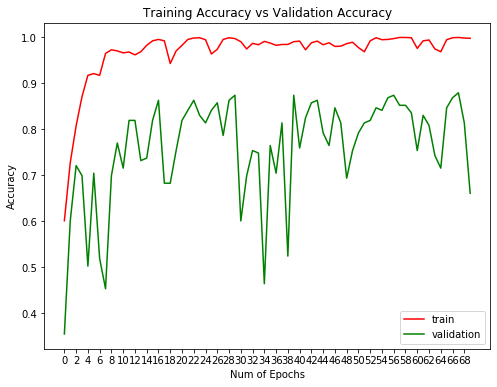

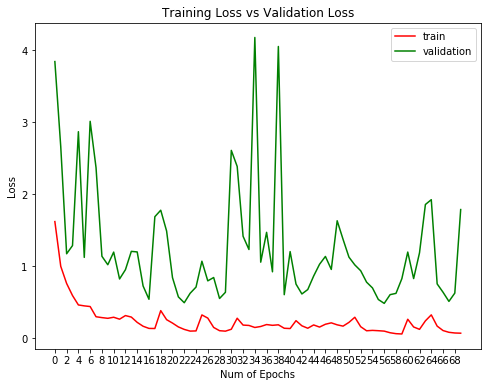

(1641, 256, 256, 3)
(1641,)
Load Model
Train on 1641 samples, validate on 183 samples
Epoch 1/70
1632/1641 [============================>.] - ETA: 0s - loss: 1.4087 - acc: 0.7212
Epoch 00001: acc improved from -inf to 0.72151, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 90s 55ms/sample - loss: 1.4064 - acc: 0.7215 - val_loss: 2.5569 - val_acc: 0.5738
Epoch 2/70
1632/1641 [============================>.] - ETA: 0s - loss: 0.7610 - acc: 0.8425
Epoch 00002: acc improved from 0.72151 to 0.84278, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 45s 28ms/sample - loss: 0.7621 - acc: 0.8428 - val_loss: 1.5575 - val_acc: 0.6393
Epoch 3/70
1632/1641 [============================>.] - ETA: 0s - loss: 0.4964 - acc: 0.9234
Epoch 00003: acc improved from 0.84278 to 0.92322, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [===================

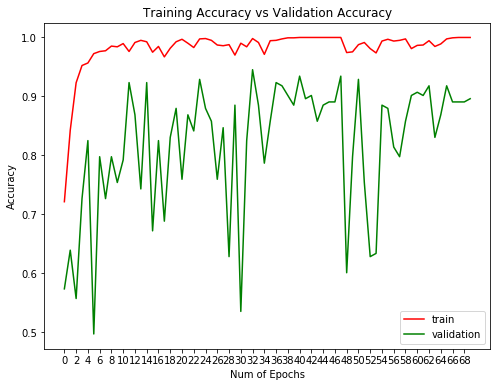

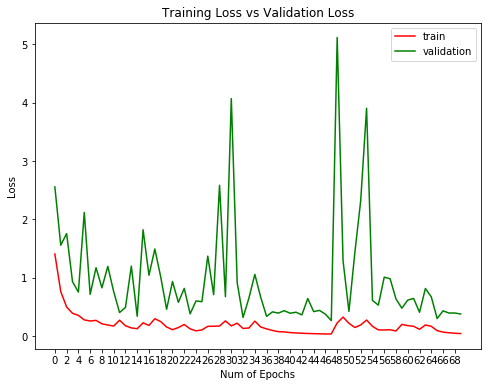

(1641, 256, 256, 3)
(1641,)
Load Model
Train on 1641 samples, validate on 183 samples
Epoch 1/70
1632/1641 [============================>.] - ETA: 0s - loss: 1.2636 - acc: 0.7990
Epoch 00001: acc improved from -inf to 0.79829, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 105s 64ms/sample - loss: 1.2612 - acc: 0.7983 - val_loss: 2.2884 - val_acc: 0.6230
Epoch 2/70
1632/1641 [============================>.] - ETA: 0s - loss: 0.5578 - acc: 0.9332
Epoch 00002: acc improved from 0.79829 to 0.93358, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==============================] - 59s 36ms/sample - loss: 0.5564 - acc: 0.9336 - val_loss: 1.3632 - val_acc: 0.6831
Epoch 3/70
1632/1641 [============================>.] - ETA: 0s - loss: 0.3136 - acc: 0.9773
Epoch 00003: acc improved from 0.93358 to 0.97684, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1641/1641 [==================

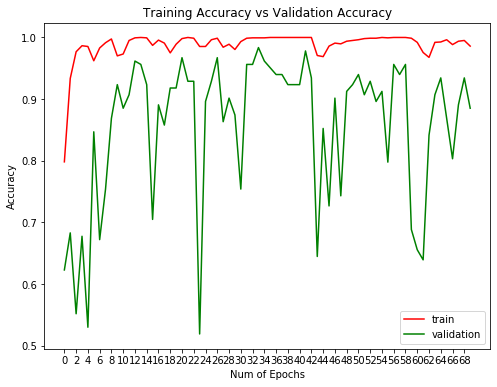

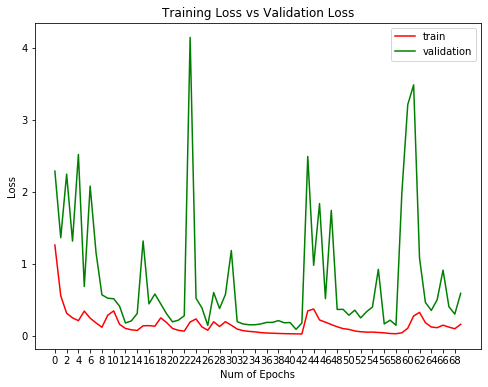

(1642, 256, 256, 3)
(1642,)
Load Model
Train on 1642 samples, validate on 182 samples
Epoch 1/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.9884 - acc: 0.8536
Epoch 00001: acc improved from -inf to 0.85445, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 124s 75ms/sample - loss: 0.9857 - acc: 0.8544 - val_loss: 5.8014 - val_acc: 0.5275
Epoch 2/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.5333 - acc: 0.9406
Epoch 00002: acc improved from 0.85445 to 0.94093, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 74s 45ms/sample - loss: 0.5324 - acc: 0.9409 - val_loss: 1.7831 - val_acc: 0.6648
Epoch 3/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.2813 - acc: 0.9798
Epoch 00003: acc improved from 0.94093 to 0.97990, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==================

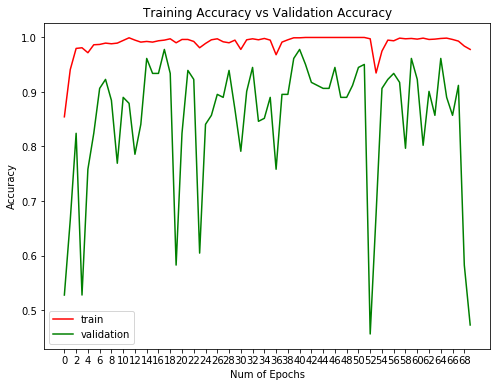

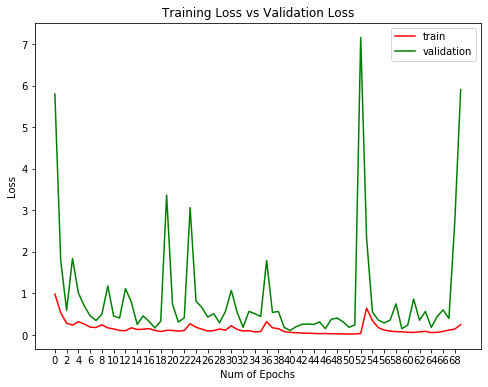

(1642, 256, 256, 3)
(1642,)
Load Model
Train on 1642 samples, validate on 182 samples
Epoch 1/70
1632/1642 [============================>.] - ETA: 0s - loss: 1.0879 - acc: 0.8407
Epoch 00001: acc improved from -inf to 0.84166, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 149s 91ms/sample - loss: 1.0850 - acc: 0.8417 - val_loss: 1.6827 - val_acc: 0.7637
Epoch 2/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.4707 - acc: 0.9638
Epoch 00002: acc improved from 0.84166 to 0.96407, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 41s 25ms/sample - loss: 0.4696 - acc: 0.9641 - val_loss: 1.5418 - val_acc: 0.7088
Epoch 3/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.2564 - acc: 0.9822
Epoch 00003: acc improved from 0.96407 to 0.98173, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==================

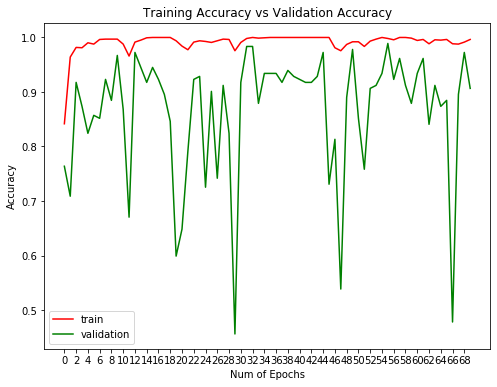

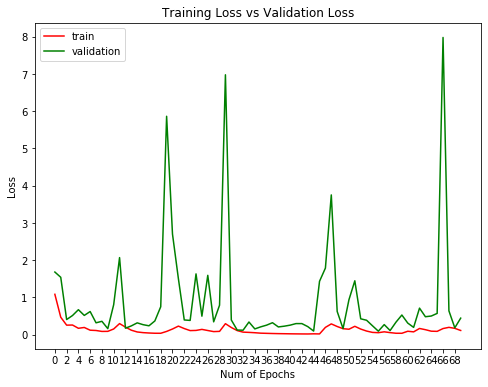

(1642, 256, 256, 3)
(1642,)
Load Model
Train on 1642 samples, validate on 182 samples
Epoch 1/70
1632/1642 [============================>.] - ETA: 0s - loss: 1.0129 - acc: 0.8787
Epoch 00001: acc improved from -inf to 0.87881, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 169s 103ms/sample - loss: 1.0121 - acc: 0.8788 - val_loss: 2.2345 - val_acc: 0.6923
Epoch 2/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.5111 - acc: 0.9596
Epoch 00002: acc improved from 0.87881 to 0.95798, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 52s 31ms/sample - loss: 0.5124 - acc: 0.9580 - val_loss: 0.5843 - val_acc: 0.8956
Epoch 3/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.3228 - acc: 0.9730
Epoch 00003: acc improved from 0.95798 to 0.97259, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [=================

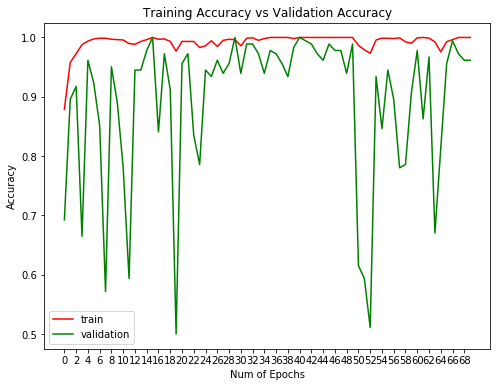

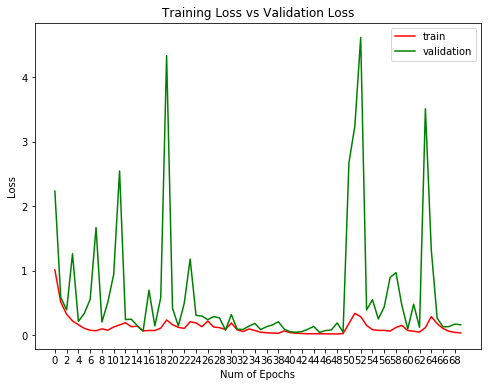

(1642, 256, 256, 3)
(1642,)
Load Model
Train on 1642 samples, validate on 182 samples
Epoch 1/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.9733 - acc: 0.8891
Epoch 00001: acc improved from -inf to 0.88916, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 192s 117ms/sample - loss: 0.9721 - acc: 0.8892 - val_loss: 6.9239 - val_acc: 0.4396
Epoch 2/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.5011 - acc: 0.9626
Epoch 00002: acc improved from 0.88916 to 0.96224, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 54s 33ms/sample - loss: 0.5014 - acc: 0.9622 - val_loss: 0.5468 - val_acc: 0.9396
Epoch 3/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.2663 - acc: 0.9865
Epoch 00003: acc improved from 0.96224 to 0.98660, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [=================

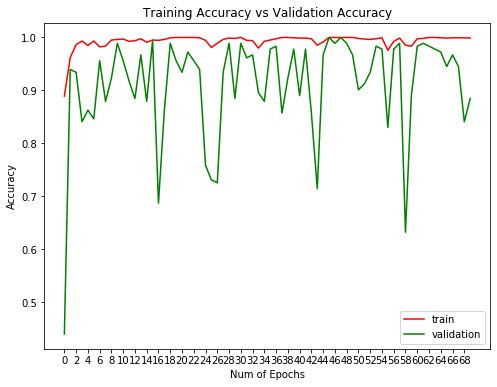

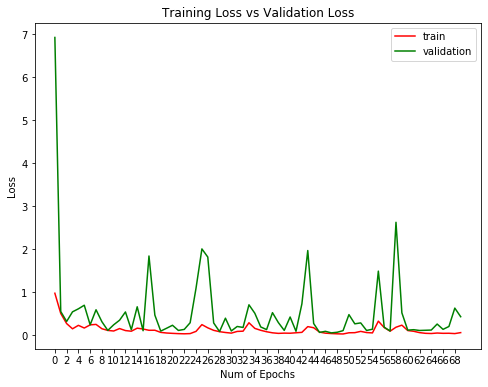

(1642, 256, 256, 3)
(1642,)
Load Model
Train on 1642 samples, validate on 182 samples
Epoch 1/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.9711 - acc: 0.8866
Epoch 00001: acc improved from -inf to 0.88733, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 220s 134ms/sample - loss: 0.9683 - acc: 0.8873 - val_loss: 2.1744 - val_acc: 0.7088
Epoch 2/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.4212 - acc: 0.9681
Epoch 00002: acc improved from 0.88733 to 0.96772, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 61s 37ms/sample - loss: 0.4210 - acc: 0.9677 - val_loss: 1.5238 - val_acc: 0.7747
Epoch 3/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.3233 - acc: 0.9786
Epoch 00003: acc improved from 0.96772 to 0.97868, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [=================

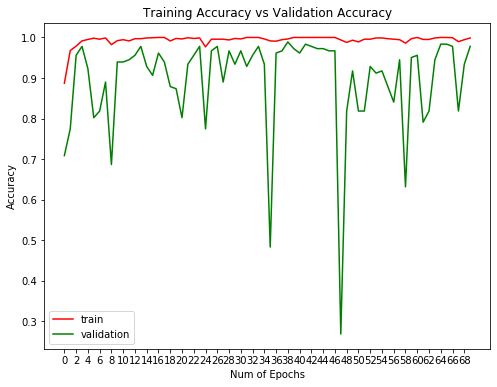

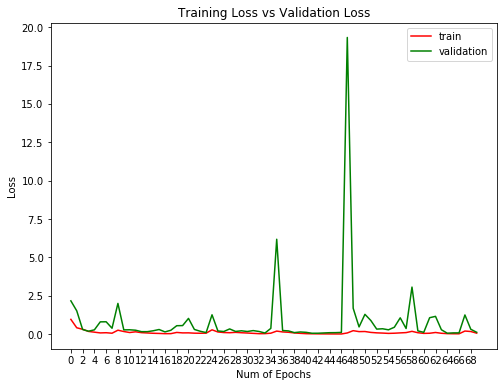

(1642, 256, 256, 3)
(1642,)
Load Model
Train on 1642 samples, validate on 182 samples
Epoch 1/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.9637 - acc: 0.8934
Epoch 00001: acc improved from -inf to 0.89281, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 239s 146ms/sample - loss: 0.9635 - acc: 0.8928 - val_loss: 4.1328 - val_acc: 0.6264
Epoch 2/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.4279 - acc: 0.9712
Epoch 00002: acc improved from 0.89281 to 0.97138, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [==============================] - 67s 41ms/sample - loss: 0.4268 - acc: 0.9714 - val_loss: 0.3204 - val_acc: 0.9670
Epoch 3/70
1632/1642 [============================>.] - ETA: 0s - loss: 0.1981 - acc: 0.9926
Epoch 00003: acc improved from 0.97138 to 0.99269, saving model to /content/drive/My Drive/MozSnake/pesos/Xception.h5
1642/1642 [=================

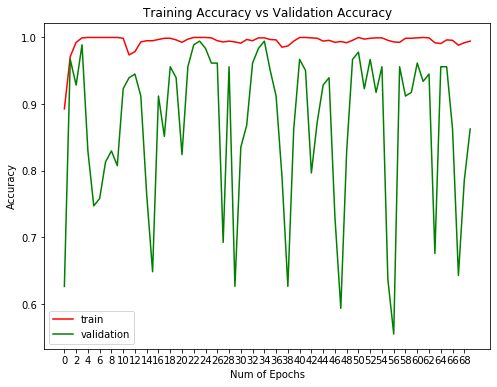

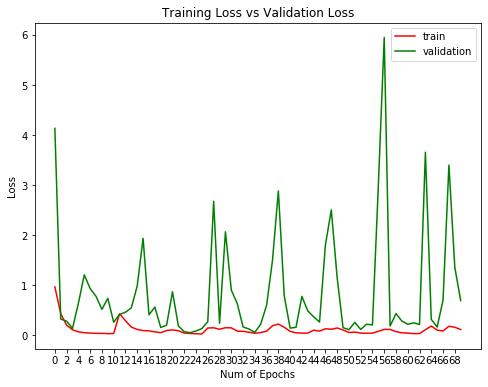

> Global accuracy: 63.124999999999986 10.72952784875191
> Global F1_Score:  63.124999999999986 10.72952784875191
> Global Precision: 63.124999999999986 10.72952784875191
> Global Recall:  63.124999999999986 10.72952784875191


In [4]:
def xception(num_class):
    stride = (2, 2);
    kernel_size = (3, 3)
    pool_size = (2, 2)
    Channel_axis = 3;

    def middle_flow(x):

        x_temp = x

        for i in range(8):
            x = LeakyReLU(alpha=0.1)(x)
            x = layers.SeparableConv2D(filters=728, kernel_size=kernel_size,
                                       use_bias=False, kernel_initializer='glorot_uniform',
                                       kernel_regularizer=regularizers.l2(0.001),
                                       padding='SAME')(x)
            x = layers.BatchNormalization(axis=Channel_axis)(x)

            x = LeakyReLU(alpha=0.1)(x)
            x = layers.SeparableConv2D(filters=728, kernel_size=kernel_size,
                                       use_bias=False, kernel_initializer='glorot_uniform',
                                       kernel_regularizer=regularizers.l2(0.001),
                                       padding='SAME')(x)
            x = layers.BatchNormalization(axis=Channel_axis)(x)

            x = LeakyReLU(alpha=0.1)(x)
            x = layers.SeparableConv2D(filters=728, kernel_size=kernel_size,
                                       use_bias=False, kernel_initializer='glorot_uniform',
                                       kernel_regularizer=regularizers.l2(0.001),
                                       padding='SAME')(x)
            x = layers.BatchNormalization(axis=Channel_axis)(x)

            x = layers.add([x, x_temp])
            x_temp = x

        return x

    def exit_flow(x):

        x_temp = x

        x = LeakyReLU(alpha=0.1)(x)
        x = layers.SeparableConv2D(filters=728, kernel_size=kernel_size,
                                   use_bias=False, kernel_initializer='glorot_uniform',
                                   padding='SAME')(x)
        x = layers.BatchNormalization(axis=Channel_axis)(x)

        x = LeakyReLU(alpha=0.1)(x)
        x = layers.SeparableConv2D(filters=1024, kernel_size=kernel_size,
                                   use_bias=False, kernel_initializer='glorot_uniform',
                                   kernel_regularizer=regularizers.l2(0.001),
                                   padding='SAME')(x)
        x = layers.BatchNormalization(axis=Channel_axis)(x)
        #

        x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

        x_shortcut = layers.Conv2D(1024, kernel_size=kernel_size,
                                   use_bias=False, kernel_initializer='glorot_uniform',
                                   kernel_regularizer=regularizers.l2(0.001),
                                   strides=stride, padding='SAME')(x_temp)
        x_shortcut = LeakyReLU(alpha=0.1)(x_shortcut)

        x = layers.add([x, x_shortcut])

        x = layers.SeparableConv2D(filters=1536, kernel_size=kernel_size,
                                   use_bias=False, kernel_initializer='glorot_uniform',
                                   padding='SAME')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = layers.BatchNormalization(axis=Channel_axis)(x)

        x = layers.SeparableConv2D(filters=2048, kernel_size=kernel_size,
                                   use_bias=False, kernel_initializer='glorot_uniform',
                                   kernel_regularizer=regularizers.l2(0.001),
                                   padding='SAME')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = layers.BatchNormalization(axis=Channel_axis)(x)

        x = layers.GlobalAveragePooling2D()(x)

        output = layers.Dense(num_class, activation=tf.nn.softmax)(x)

        return output

    def entry_flow(img_input):

        x = layers.Conv2D(32, kernel_size=kernel_size,
                          use_bias=False, kernel_initializer='glorot_uniform',
                          kernel_regularizer=regularizers.l2(0.001),
                          strides=stride, padding='SAME')(img_input)
        x = LeakyReLU(alpha=0.1)(x)
        x = layers.BatchNormalization(axis=Channel_axis)(x)

        x = layers.Conv2D(64, kernel_size=kernel_size,
                          use_bias=False, kernel_initializer='glorot_uniform',
                          kernel_regularizer=regularizers.l2(0.001),
                          padding='SAME')(x)
        x = LeakyReLU(alpha=0.1)(x)
        x = layers.BatchNormalization(axis=Channel_axis)(x)

        x_temp = x

        for filter in [128, 256, 728]:
            if filter != 128:
                x = LeakyReLU(alpha=0.1)(x)
            x = layers.SeparableConv2D(filter, kernel_size=kernel_size,
                                       use_bias=False, kernel_initializer='glorot_uniform',
                                       kernel_regularizer=regularizers.l2(0.001),
                                       padding='SAME')(x)
            x = layers.BatchNormalization(axis=Channel_axis)(x)
            # x = layers.Dropout(0.5)(x)

            x = LeakyReLU(alpha=0.1)(x)
            x = layers.SeparableConv2D(filter, kernel_size=kernel_size,
                                       use_bias=False, kernel_initializer='glorot_uniform',
                                       kernel_regularizer=regularizers.l2(0.001),
                                       padding='SAME')(x)
            x = layers.BatchNormalization(axis=Channel_axis)(x)
            # x = layers.Dropout(0.5)(x)

            x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

            x_shortcut = layers.Conv2D(filter, kernel_size=kernel_size,
                                       use_bias=False, kernel_initializer='glorot_uniform',
                                       kernel_regularizer=regularizers.l2(0.001),
                                       strides=stride, padding='SAME')(x_temp)
            x_shortcut = LeakyReLU(alpha=0.1)(x_shortcut)

            x = layers.add([x, x_shortcut])
            x_temp = x

        return x

    img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    x = entry_flow(img_input)
    x = middle_flow(x)
    output = exit_flow(x)

    model = models.Model(inputs=img_input, outputs=output, name='Xception')

    return model


kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=29)

indice = 0

for train, test in kf.split(imagens, labels):
    imgs_train, imgs_val = imagens[train], imagens[test]
    labs_train, labs_val = labels[train], labels[test]

    # labs_train = tf.keras.utils.to_categorical(labs_train, num_class)
    # labs_test = tf.keras.utils.to_categorical(labs_test, num_class)

    print(imgs_train.shape)
    print(labs_train.shape)

    model = xception(num_class)

    checkpoint = ModelCheckpoint(str(pesos) + "/Xception" + ".h5",
                                 monitor='acc', verbose=1,
                                 save_best_only=True, mode='auto')
    if indice > 0:
        model.load_weights(str(pesos) + "/Xception" + ".h5")
        print("Load Model")

    model.compile(loss=loss_function,
                  optimizer=optmizer,
                  metrics=['accuracy'])

    xcept = model.fit(imgs_train, labs_train,
                      validation_data=(imgs_val, labs_val), verbose=1,
                      epochs=epoch, callbacks=[checkpoint])

    imgs_test, labs_test = load_data(test_data)

    labs_predict = model.predict(imgs_test)
    labs_predict = np.argmax(labs_predict, axis=1)
    #
    accuracy = metrics.accuracy_score(labs_test, labs_predict)
    acc_folds.append(accuracy * 100)

    f1 = metrics.f1_score(labs_test, labs_predict, average="micro")
    f1_folds.append(f1 * 100)

    precision = metrics.precision_score(labs_test, labs_predict, average="micro")
    prec_folds.append(precision * 100)

    recall = metrics.recall_score(labs_test, labs_predict, average="micro")
    recall_folds.append(recall * 100)

    print('Acurracy: %f' % accuracy)
    print('F1: %f' % f1)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)

    indice += 1

    plt.figure(0)
    plt.plot(xcept.history['acc'], 'r')
    plt.plot(xcept.history['val_acc'], 'g')
    plt.xticks(np.arange(0, epoch, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train', 'validation'])

    plt.figure(1)
    plt.plot(xcept.history['loss'], 'r')
    plt.plot(xcept.history['val_loss'], 'g')
    plt.xticks(np.arange(0, epoch, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train', 'validation'])

    plt.show()

    model = None
    plt.show()
    del xcept
    del model
    del imgs_train
    del imgs_test
    del labs_test
    del labs_train
    del imgs_val
    del labs_val
    gc.collect()

print("===================================================================")
print(f'> Global accuracy: {np.mean(acc_folds)} {np.std(acc_folds)}')
print(f'> Global F1_Score:  {np.mean(f1_folds)} {np.std(f1_folds)}')
print(f'> Global Precision: {np.mean(prec_folds)} {np.std(prec_folds)}')
print(f'> Global Recall:  {np.mean(recall_folds)} {np.std(recall_folds)}')
print("===================================================================")